# Машинное обучение, ФКН ВШЭ

## Практическое задание 5

### Общая информация
Дата выдачи: 08.11.2018

Мягкий дедлайн: 7:59MSK 18.11.2018

Жесткий дедлайн: 23:59MSK 19.11.2018

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py
* Ссылка на посылку в Яндекс.Контесте:

В контест https://contest.yandex.ru/contest/9963/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

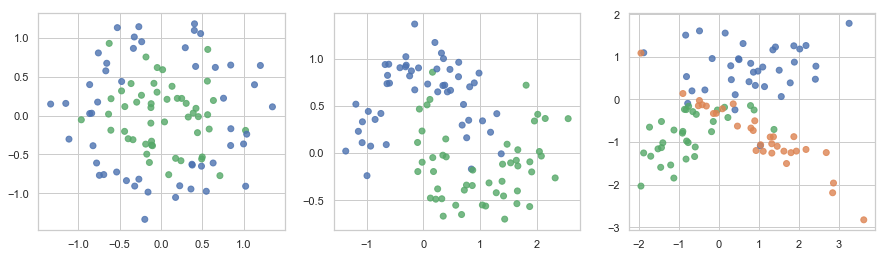

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

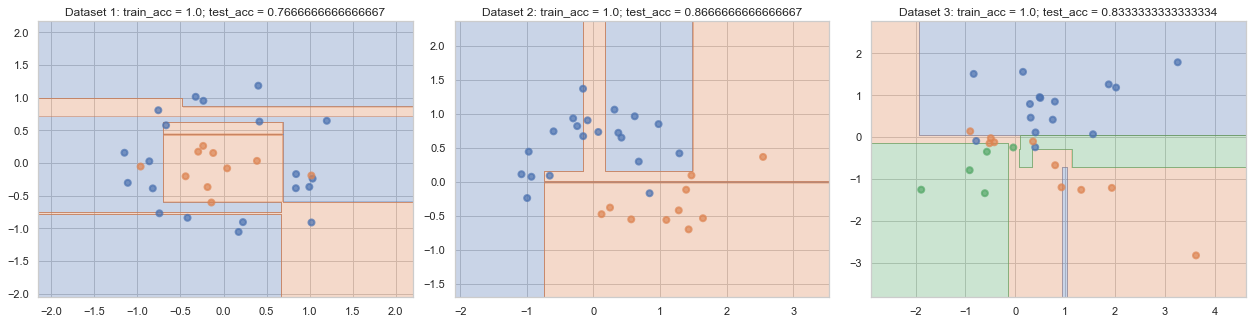

In [6]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(18, 5))

for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tr = DecisionTreeClassifier()
    tr.fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tr, X_test, y_test)
    plt.title('Dataset {}: train_acc = {}; test_acc = {}'.format(i + 1,
                                                               accuracy_score(y_train, tr.predict(X_train)),
                                                               accuracy_score(y_test, tr.predict(X_test))))

__Ответ:__ Да, дерево обучилось правильно классифицировать обучающую выборку и делает ошибки на тестовой.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

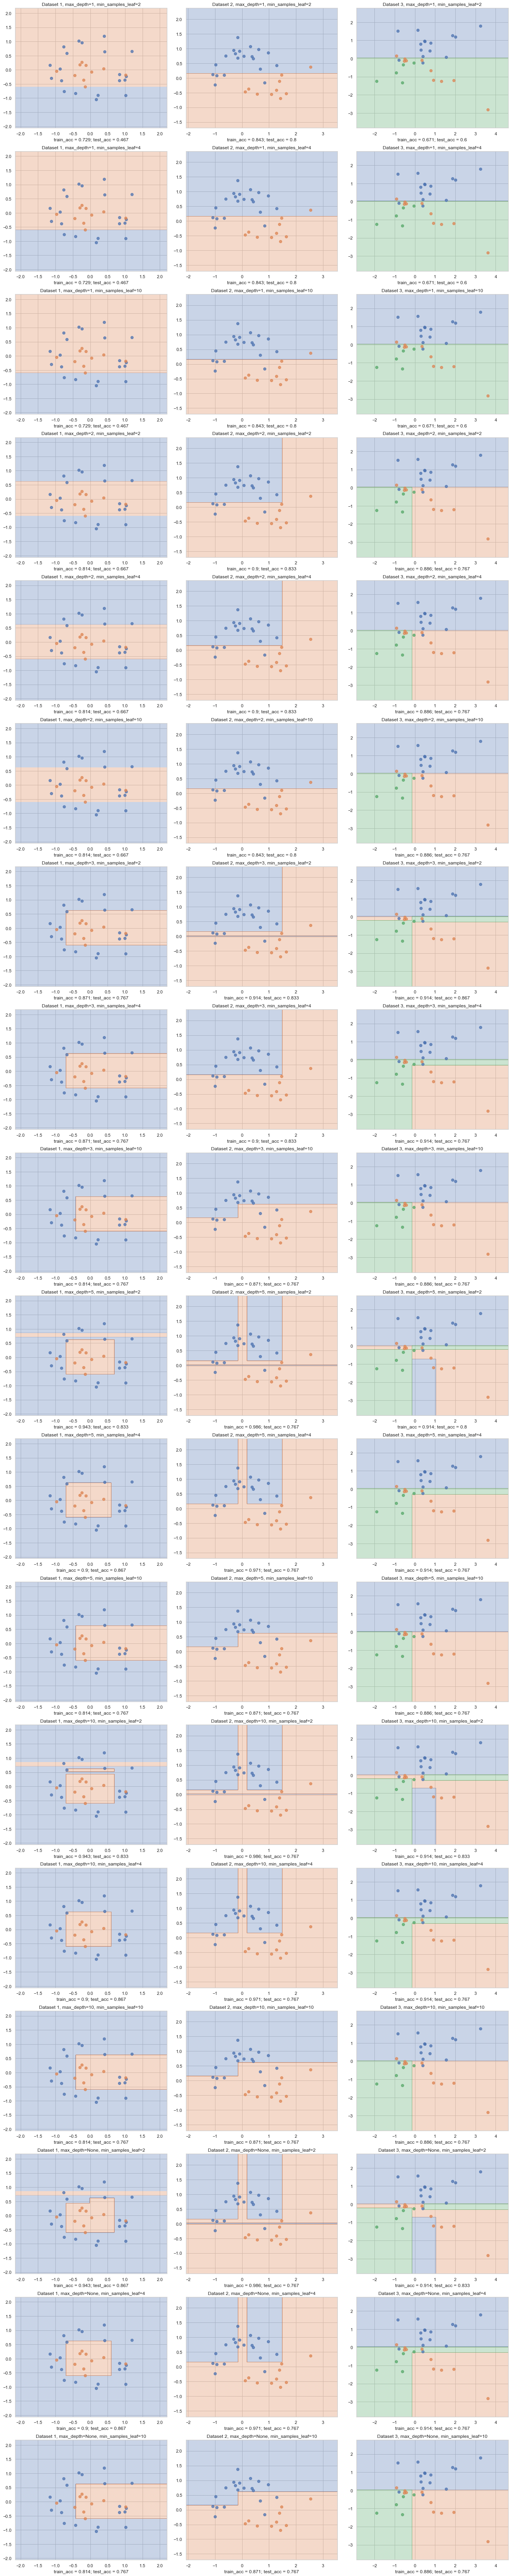

In [14]:
max_depth_array = np.array([1, 2, 3, 5, 10, None])
min_samples_leaf_array = np.array([2, 4, 10])

plt.figure(figsize=(18, 3 * 6 * 5))

for j, max_depth in enumerate(max_depth_array):
    for k, min_samples_leaf in enumerate(min_samples_leaf_array):
        for i, (x, y) in enumerate(datasets):
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
            tr = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tr.fit(X_train, y_train)
            plt.subplot(18, 3, i + 1 + k * 3 + j * 3 * 3)
            plot_surface(tr, X_test, y_test)
            plt.title('Dataset {}, max_depth={}, min_samples_leaf={}'.format(i + 1, max_depth, min_samples_leaf))
            plt.xlabel('train_acc = {}; test_acc = {}'.format(round(accuracy_score(y_train, tr.predict(X_train)), 3),
                                                              round(accuracy_score(y_test, tr.predict(X_test)), 3)))
plt.tight_layout()

__Ответ:__ При увеличении глубины дерева разделяющая плоскость лучше описывает обучающую выборку, состоит из большего числа прямоугольников. При увеличении минимального числа объектов, находящихся в листе дерева, разделяющая плоскость лучше обобщает все данные, меньше переобучается. На разных наборах данных наилучшие комбинации этих двух параметров разные, это зависит от распределения объектов в признаковом пространстве, количестве классов.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Ссылка на решение: https://contest.yandex.ru/contest/9963/run-report/18213270/

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

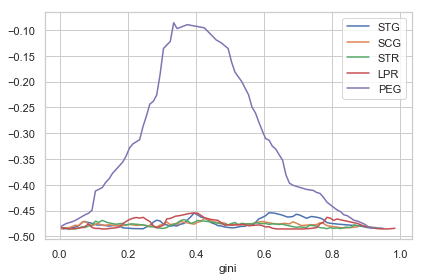

In [25]:
import pandas as pd
from hw5code import find_best_split
import matplotlib.pyplot as plt

data = pd.read_csv('students.csv')
target = data[data.keys()[-1]].values
data = data.drop(data.keys()[-1], axis=1)

for c in data.columns:
    thresholds, ginis, _, _ = find_best_split(data[c].values, target)
    plt.plot(thresholds, ginis, label=c)
    plt.xlabel("threshold")
    plt.xlabel("gini")

plt.legend()
plt.tight_layout()

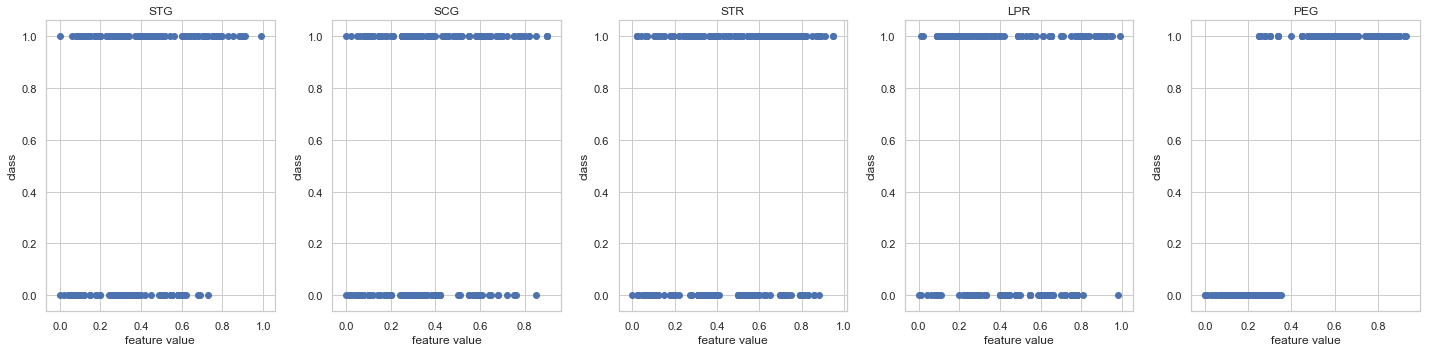

In [8]:
plt.figure(figsize=(20, 5))
for i, c in enumerate(data.columns):
    plt.subplot(1, 5, i + 1)
    plt.scatter(data[c].values, target)
    plt.xlabel("feature value")
    plt.ylabel("class")
    plt.title(c)
plt.tight_layout()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из кривых значений критерия Джини, лучше всего разбивать выборку по признаку PEG, так как на нём Gini принимает наибольшее значение. То же можно сказать, посмотрев на scatter-графики, так как только на графике PEG выборку можно разделить на 2 класса вертикальной прямой. Для "хороших" признаков кривая должна быть выпукла вверх, у признаков, по которым деление практически невозможно, эта кривая близка к горизонтальной линии и имеет множество локальных максимумов.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».
 
Ссылка на решение: https://contest.yandex.ru/contest/9963/run-report/18213270/

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [10]:
import io
import requests
from sklearn.preprocessing import LabelEncoder

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])

In [11]:
from sklearn.model_selection import train_test_split
target = c[c.columns[0]].values
c = c.drop(columns = [c.columns[0]]).values
X_train, X_test, y_train, y_test = train_test_split(c, target, test_size=0.5, random_state=42)

In [12]:
from hw5code import DecisionTree
from itertools import repeat

tree = DecisionTree(list(repeat("categorical", X_train.shape[1])))
tree.fit(X_train, y_train)
print("Accuracy = ", accuracy_score(y_test, tree.predict(X_test)))
print("Depth = ", tree._depth)

Accuracy =  1.0
Depth =  10


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])
y = c[c.columns[-1]].values
X = c.drop(columns = [c.columns[-1]]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [21]:
depths = np.arange(1, 50)
splits = np.arange(2, 17)
leafs = np.arange(1, 16)

acc_d = []
for d in depths:
    tree = DecisionTree(list(repeat("categorical", X_train.shape[1])), max_depth=d)
    tree.fit(X_train, y_train)
    acc_d.append(accuracy_score(y_test, tree.predict(X_test)))

acc_s = []
for s in splits:
    tree = DecisionTree(list(repeat("categorical", X_train.shape[1])), min_samples_split=s)
    tree.fit(X_train, y_train)
    acc_s.append(accuracy_score(y_test, tree.predict(X_test)))
    
acc_l = []
for l in leafs:
    tree = DecisionTree(list(repeat("categorical", X_train.shape[1])), min_samples_leaf=l)
    tree.fit(X_train, y_train)
    acc_l.append(accuracy_score(y_test, tree.predict(X_test)))

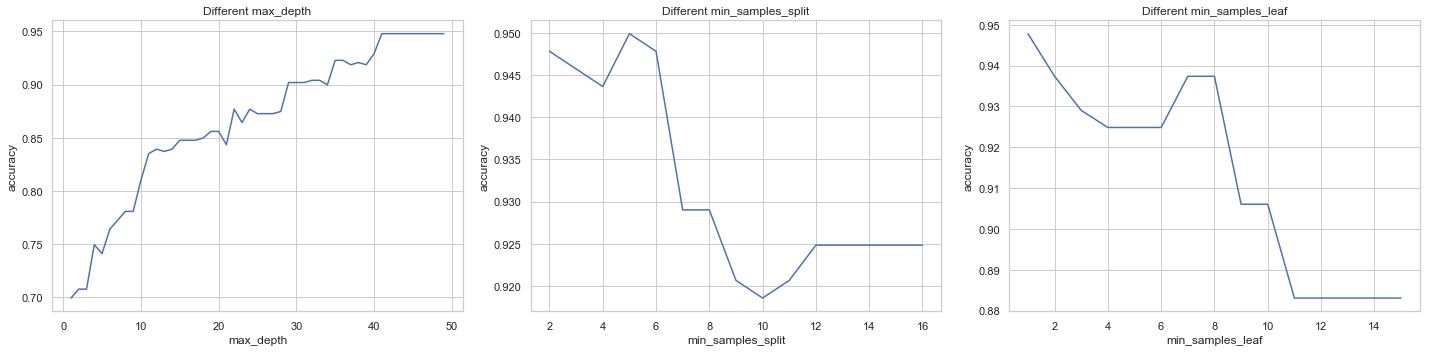

In [23]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.plot(depths, acc_d)
plt.title("Different max_depth")
plt.xlabel("max_depth")
plt.ylabel("accuracy")

plt.subplot(1, 3, 2)
plt.plot(splits, acc_s)
plt.title("Different min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")

plt.subplot(1, 3, 3)
plt.plot(leafs, acc_l)
plt.title("Different min_samples_leaf")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.tight_layout()

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [17]:
X, y, names = [], [], []

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])
y.append(c[c.columns[0]].values)
X.append(c.drop(columns = [c.columns[0]]).values)
names.append('mashrooms')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])
y.append(c[c.columns[-1]].values)
X.append(c.drop(columns = [c.columns[-1]]).values)
names.append('tic-tac-toe')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
target = c[c.columns[-1]].values
c = c.drop(columns = [c.columns[-1]])
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])
X.append(c.values)
y_car = np.ones(target.size)
y_car[np.logical_or(target == 'acc', target == 'unacc')] = 0
y.append(y_car)
names.append('car')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
s = requests.get(url).content
c = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
target = c[c.columns[-1]].values
c = c.drop(columns = [c.columns[-1]])
for column in c.columns:
    lr = LabelEncoder()
    c[column] = lr.fit_transform(c[column])
X.append(c.values)
y_nursery = np.ones(target.size)
y_nursery[np.logical_or(target == 'not_recom', target == 'recommend')] = 0
y.append(y_nursery)
names.append('nursery')

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder

results = np.zeros((4, 4))
for i, X_ in enumerate(X):
    y_ = y[i]
    tree = DecisionTree(list(repeat("real", X_.shape[1])))
    results[i, 0] = cross_val_score(tree, X_, y_, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
    tree = DecisionTree(list(repeat("categorical", X_.shape[1])))
    results[i, 1] = cross_val_score(tree, X_, y_, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
    enc = OneHotEncoder(sparse=False)
    X_onehot = enc.fit_transform(X_)
    tree = DecisionTree(list(repeat("real", X_onehot.shape[1])))
    results[i, 2] = cross_val_score(tree, X_onehot, y_, cv=10, scoring=make_scorer(accuracy_score)).mean()
    
    tree = DecisionTreeClassifier()
    results[i, 3] = cross_val_score(tree, X_, y_, cv=10, scoring=make_scorer(accuracy_score)).mean()

df = pd.DataFrame(results, index=names, columns=['real', 'categorical', 'one_hot', 'DecisionTreeClassifier'])
df

,real,categorical,one_hot,DecisionTreeClassifier
mashrooms,0.999261,1.000000,0.999631,0.962593
tic-tac-toe,0.470691,0.541458,0.544616,0.719169
car,0.939740,0.967546,0.919495,0.940972
nursery,0.999691,0.999846,0.999537,0.999691


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Нет, не одинаково. На наборе данных 'tic-tac-toe' DecisionTree работает хуже. В данном наборе данных важен порядок признаков, а при построении DecisionTree мы не учитываем положение признака.